# Fake and Real News Dataset

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [51]:
import re
import pandas as pd
import numpy as np

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# NLP libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk


In [24]:
np.random.seed(42)

In [25]:
fake_data=pd.read_csv('../w207-data/Fake.csv')
true_data=pd.read_csv('../w207-data/True.csv')
fake_data['label']=0
true_data['label']=1
fake_corpus=fake_data[['text','label']]
true_corpus=true_data[['text','label']]
frames=[fake_corpus,true_corpus]

data=pd.concat(frames)
shuffle = np.random.permutation(np.arange(data.shape[0]))
data = data.iloc[shuffle]

train, test = train_test_split(data, test_size=0.2)

In [38]:
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [26]:
data.head()

,text,label
22216,"21st Century Wire says Ben Stein, reputable pr...",0
4436,WASHINGTON (Reuters) - U.S. President Donald T...,1
1526,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
1377,"On Monday, Donald Trump once again embarrassed...",0
8995,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [31]:
corpus_train = train['text']
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1))
X_train = cv.fit_transform(corpus_train)
length_vocab = len(cv.vocabulary_)

In [32]:
length_vocab

111476

In [35]:
tfidf = TfidfVectorizer(lowercase=True, stop_words="english")
X_train = tfidf.fit_transform(corpus_train)

In [37]:
X_train[0:5].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12040841, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [40]:
# Remove punctuation
train['text_p'] = train['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
train['text_p'] = train['text_p'].map(lambda x: x.lower())
# Print out the first rows of papers
train['text_p'].head()

23070    21st century wire says incredibly on the same ...
13728    what a role model for women and young girls a ...
4712     washington (reuters) - a member of the house r...
519      ron paul who s a retired doctor not an economi...
4407     washington (reuters) - the chairman of the us ...
Name: text_p, dtype: object

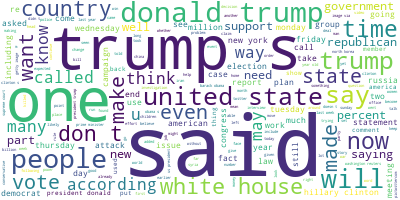

In [41]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(train['text_p'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [43]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = train.text_p.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['st', 'century', 'wire', 'says', 'incredibly', 'day', 'us', 'intelligence', 'officials', 'due', 'meet', 'president', 'elect', 'donald', 'trump', 'alleged', 'russian', 'hack', 'report', 'like', 'clockwork', 'another', 'active', 'shooter', 'event', 'springs', 'time', 'fort', 'lauderdale', 'international']


In [46]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 4), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


In [47]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"trump" + 0.009*"said" + 0.007*"us" + 0.006*"president" + '
  '0.005*"would" + 0.004*"one" + 0.003*"house" + 0.003*"reuters" + '
  '0.003*"people" + 0.003*"also"'),
 (1,
  '0.011*"said" + 0.007*"trump" + 0.006*"us" + 0.006*"state" + '
  '0.005*"president" + 0.004*"one" + 0.004*"would" + 0.004*"people" + '
  '0.004*"obama" + 0.004*"new"'),
 (2,
  '0.014*"said" + 0.008*"trump" + 0.007*"would" + 0.007*"us" + 0.005*"people" '
  '+ 0.004*"president" + 0.003*"house" + 0.003*"new" + 0.003*"state" + '
  '0.003*"states"'),
 (3,
  '0.017*"trump" + 0.011*"said" + 0.006*"president" + 0.006*"us" + '
  '0.005*"would" + 0.005*"people" + 0.003*"donald" + 0.003*"one" + '
  '0.003*"could" + 0.003*"state"'),
 (4,
  '0.016*"trump" + 0.009*"said" + 0.007*"would" + 0.005*"us" + '
  '0.005*"president" + 0.004*"one" + 0.003*"state" + 0.003*"people" + '
  '0.003*"white" + 0.003*"also"'),
 (5,
  '0.012*"trump" + 0.011*"said" + 0.005*"one" + 0.005*"president" + 0.004*"us" '
  '+ 0.004*"would" + 0.0

In [48]:
print(train['label'].value_counts(),'\n Shape of Data is ',train.shape)
corpus=train['text']
labels=train['label']
test_corpus=test['text']
test_labels=test['label']
cv=CountVectorizer(ngram_range=(1,1))
train_cv=cv.fit_transform(corpus)
test_cv=cv.transform(test_corpus)

0    18796
1    17122
Name: label, dtype: int64 
 Shape of Data is  (35918, 3)


In [49]:
log_model=LogisticRegression(solver="liblinear", multi_class="auto")
log_model.fit(train_cv,labels)
pred_labels=log_model.predict(test_cv)

In [52]:
f1_score=round(metrics.f1_score(test_labels,pred_labels,average="weighted"),5)
weights=log_model.coef_
print(weights)

[[-4.95766988e-02 -8.08288083e-03  1.46726949e-02 ... -6.20069710e-06
   1.43306080e-06 -4.49755776e-08]]


In [53]:
f1_score

0.99666

https://www.kaggle.com/josutk/only-one-word-99-2

The dataset has many features that point to bias towards fake news, apparently a poorly structured dataset that does not allow you to raise more consistent information in relation to real characteristics that fake news can present

The fact that fake news is mixed with twitters points out a lack of care for the data, generating a dataset that is extremely simple to be able to accept high results without much engineering.

Resulting in the end the use of a single word can allow almost 100% what is true or false news